DATA ANALYTICS COURSE BASED PROJECT

Handwritten Digit Classification

Sample Dataset: MNIST

● Train at least two classifiers (Naive Bayes, Decision Tree, LDA, or
SVM).

● Compare accuracy with and without PCA dimensionality reduction.

● Perform k-fold cross-validation to evaluate classifiers.

● Describe  how scalability (parallelization) could improve training.

In [ ]:
!pip install python-mnist

In [ ]:
import os
import numpy as np
from mnist import MNIST

# Update this path to where your MNIST .gz files or extracted files are stored in Drive
mnist_path = '/content/drive/MyDrive/datasets/new da'

print(os.listdir(mnist_path))

['train-labels-idx1-ubyte', 't10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte', 'train-images-idx3-ubyte']


In [ ]:
mndata = MNIST(mnist_path)
X_train, y_train = mndata.load_training()
X_test, y_test = mndata.load_testing()


In [ ]:
# Convert lists to NumPy arrays
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int64)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.int64)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (60000, 784) (60000,)
Test set shape: (10000, 784) (10000,)


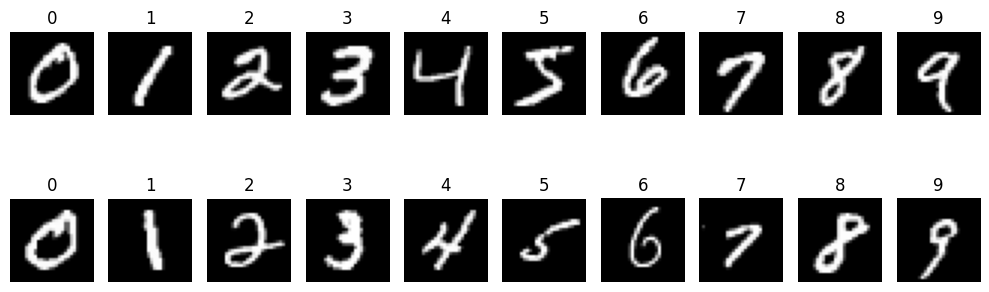

In [ ]:
import matplotlib.pyplot as plt

def show_samples(X, y, n_per_class=1):
    plt.figure(figsize=(10, 4)) # Adjust figure size for horizontal display
    idx = 0
    for k in range(n_per_class):
        for digit in range(10):
            inds = np.where(y == digit)[0][:n_per_class]
            i = inds[k] # Select the k-th sample for each digit
            plt.subplot(n_per_class, 10, idx+1) # Change subplot layout for horizontal
            plt.imshow(X[i].reshape(28,28), cmap='gray')
            plt.title(f"{digit}")
            plt.axis('off')
            idx += 1
    plt.tight_layout()
show_samples(X_train, y_train, n_per_class=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Normalize pixel data [0-255] to [0-1]
X_train /= 255.0
X_test /= 255.0

# Standardize features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
nb = GaussianNB()
svm = SVC(kernel='linear', random_state=42)


In [ ]:
nb.fit(X_train_scaled, y_train)



GaussianNB()

In [ ]:
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_nb = nb.predict(X_test_scaled)
print("Naive Bayes Accuracy (No PCA): ", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy (No PCA):  0.524


In [ ]:
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy (No PCA): ", accuracy_score(y_test, y_pred_svm))

SVM Accuracy (No PCA):  0.9293


In [ ]:
n_components = 50

nb_pca_pipeline = Pipeline([
    ('pca', PCA(n_components=n_components)),
    ('nb', GaussianNB())
])

svm_pca_pipeline = Pipeline([
    ('pca', PCA(n_components=n_components)),
    ('svm', SVC(kernel='linear', random_state=42))
])

# Train pipelines on unscaled normalized data (no further scaling inside pipeline)
nb_pca_pipeline.fit(X_train, y_train)
svm_pca_pipeline.fit(X_train, y_train)


Pipeline(steps=[('pca', PCA(n_components=50)),
                ('svm', SVC(kernel='linear', random_state=42))])

In [ ]:
y_pred_nb_pca = nb_pca_pipeline.predict(X_test)
print("Naive Bayes Accuracy (With PCA): ", accuracy_score(y_test, y_pred_nb_pca))

y_pred_svm_pca = svm_pca_pipeline.predict(X_test)
print("SVM Accuracy (With PCA): ", accuracy_score(y_test, y_pred_svm_pca))


Naive Bayes Accuracy (With PCA):  0.8776
SVM Accuracy (With PCA):  0.938


In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

nb_cv_scores = cross_val_score(nb, X_train_scaled, y_train, cv=kfold, n_jobs=-1)
svm_cv_scores = cross_val_score(svm, X_train_scaled, y_train, cv=kfold, n_jobs=-1)

nb_pca_cv_scores = cross_val_score(nb_pca_pipeline, X_train, y_train, cv=kfold, n_jobs=-1)
svm_pca_cv_scores = cross_val_score(svm_pca_pipeline, X_train, y_train, cv=kfold, n_jobs=-1)

print("Naive Bayes CV Accuracy (No PCA): ", np.mean(nb_cv_scores))
print("SVM CV Accuracy (No PCA): ", np.mean(svm_cv_scores))
print("Naive Bayes CV Accuracy (With PCA): ", np.mean(nb_pca_cv_scores))
print("SVM CV Accuracy (With PCA): ", np.mean(svm_pca_cv_scores))


Naive Bayes CV Accuracy (No PCA):  0.5366833333333333
SVM CV Accuracy (No PCA):  0.9205833333333333
Naive Bayes CV Accuracy (With PCA):  0.8698
SVM CV Accuracy (With PCA):  0.9318333333333333


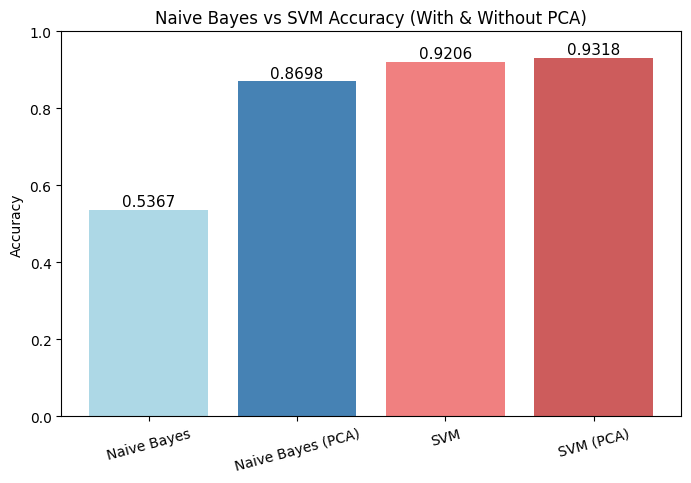

In [ ]:
import matplotlib.pyplot as plt
models = ['Naive Bayes', 'Naive Bayes (PCA)', 'SVM', 'SVM (PCA)']
accuracies = [np.mean(nb_cv_scores), np.mean(nb_pca_cv_scores), np.mean(svm_cv_scores), np.mean(svm_pca_cv_scores)]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['lightblue', 'steelblue', 'lightcoral', 'indianred'])
plt.title('Naive Bayes vs SVM Accuracy (With & Without PCA)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=11)
plt.xticks(rotation=15)
plt.show()

In [ ]:
print("Classification Report for Naive Bayes (No PCA):")
print(classification_report(y_test, y_pred_nb))

print("Classification Report for SVM (No PCA):")
print(classification_report(y_test, y_pred_svm))


Classification Report for Naive Bayes (No PCA):
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       980
           1       0.89      0.94      0.91      1135
           2       0.90      0.18      0.29      1032
           3       0.65      0.28      0.39      1010
           4       0.86      0.13      0.23       982
           5       0.45      0.03      0.06       892
           6       0.69      0.92      0.79       958
           7       0.88      0.20      0.32      1028
           8       0.25      0.70      0.37       974
           9       0.36      0.95      0.53      1009

    accuracy                           0.52     10000
   macro avg       0.67      0.52      0.47     10000
weighted avg       0.68      0.52      0.48     10000

Classification Report for SVM (No PCA):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97 

In [ ]:
print("Classification Report for Naive Bayes (With PCA):")
print(classification_report(y_test, y_pred_nb_pca))

print("Classification Report for SVM (With PCA):")
print(classification_report(y_test, y_pred_svm_pca))

Classification Report for Naive Bayes (With PCA):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       980
           1       0.96      0.94      0.95      1135
           2       0.85      0.84      0.84      1032
           3       0.85      0.86      0.85      1010
           4       0.86      0.87      0.86       982
           5       0.78      0.85      0.82       892
           6       0.93      0.92      0.92       958
           7       0.92      0.85      0.88      1028
           8       0.84      0.85      0.84       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Classification Report for SVM (With PCA):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.97      0.99      0

Naive Bayes:

~The computation of feature probabilities for each digit class can be done independently and in parallel, speeding up model training on images with many pixels.

~Parallel processing helps reduce training time, especially when working with large digit datasets like MNIST or during repeated tasks such as cross-validation or ensemble building.



---


SVM:

~Training involves finding optimal hyperplanes and support vectors, which is computationally intensive for high-dimensional image data.

~Parallelization enables simultaneous evaluation of candidate splits or kernel computations, accelerating model training significantly.

~For large datasets like MNIST, parallelizing cross-validation folds or grid search for hyperparameter tuning further reduces wall-clock time.



---

**Overall, parallelization allows these models to handle the high dimensionality and large volume of handwritten digit data more efficiently, enabling faster iterations and better scalability in practical applications.**